**Clayton Evans     **
**Project 2 - Mileston 3         **
**February 1, 2023**

In [1]:
#importing required libraries
import pandas as pd
import numpy  as np
import statistics as st
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import scipy.stats as sc
import statsmodels.formula.api as smf

import thinkstats2

from scipy.stats import pearsonr
from scipy.stats import ttest_ind
from scipy.stats import ttest_rel
from scipy import stats

from statsmodels.stats.power import TTestIndPower


from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline


In [2]:
#Load dataframe with the housing data and add the headers
df = pd.read_csv("Housing.csv", 
                 names=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'])

print(len(df))

506


In [3]:
#Drop any N/A values from the dataframe
df.dropna()

print(len(df))

506


In [4]:
#Print a head of the data frame for viewing
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [10]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [5]:
#load the data for rooms in the data frame into a Series to calculate the mean and the standard deviation
Rooms = df['RM']

print("The Standard Deviation for the number of rooms is: ",st.stdev(Rooms))
print("The mean for the number of rooms is :", st.mean(Rooms))

The Standard Deviation for the number of rooms is:  0.7026171434153233
The mean for the number of rooms is : 6.284634387351779


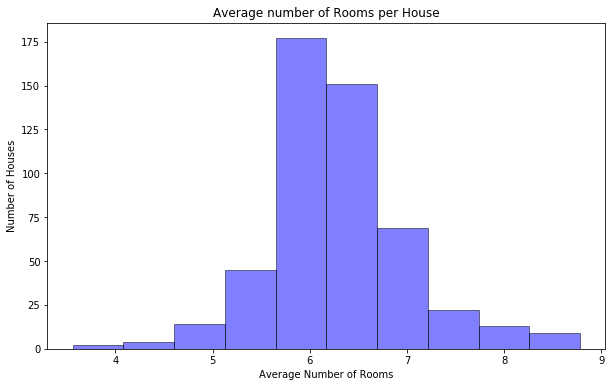

In [6]:
#Creating a Histogram for the Rooms
f, ax = plt.subplots(figsize=(10,6))
num_bins = 10
n, bins, patches = plt.hist(Rooms, num_bins, facecolor='blue', alpha=0.5, edgecolor='k', linewidth=1)

# Add title and axis names
plt.title('Average number of Rooms per House')
plt.xlabel('Average Number of Rooms')
plt.ylabel('Number of Houses')

plt.show()



In [7]:
#Load the median vale of houses into a Series
med_val = df['MEDV']

print(med_val)

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64


In [8]:
#Calculate Pearson's Correlation between Number of houses and median home price
corr, _ = pearsonr(Rooms, med_val)

#Print Pearson's Correlation rounded to the nearest 3 decimal places
print("Pearson's correlation for number of rooms and median house price is: %.3f" % corr)


Pearson's correlation for number of rooms and median house price is: 0.695


Steps used to complete the linear regression were found at https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f

In [9]:
#Created a new data frame to use for a linear regression and to describe the data
df_lin = pd.DataFrame(df, columns = ['RM', 'MEDV'])

df_lin.describe()

,RM,MEDV
count,506.000000,506.000000
mean,6.284634,22.532806
std,0.702617,9.197104
min,3.561000,5.000000
25%,5.885500,17.025000
50%,6.208500,21.200000
75%,6.623500,25.000000
max,8.780000,50.000000


In [10]:
#Preparing and shaping the data to train the data or a linear regression
X = df_lin['RM'].values.reshape(-1,1)
y = df_lin['MEDV'].values.reshape(-1,1)

In [11]:
#Splitting data for training with 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [12]:
#Training Model
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
#Load predicted values
y_pred = regressor.predict(X_test)

In [14]:
#Visual for Actual to Predicted

df_lin_test = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df_lin_test.head(25)

,Actual,Predicted
0,22.6,22.904452
1,50.0,21.807415
2,23.0,23.279508
3,8.3,13.678090
4,21.2,21.957437
5,19.9,18.225636
6,20.6,18.891360
7,18.7,19.482072
8,16.1,10.152570
9,18.6,23.579552


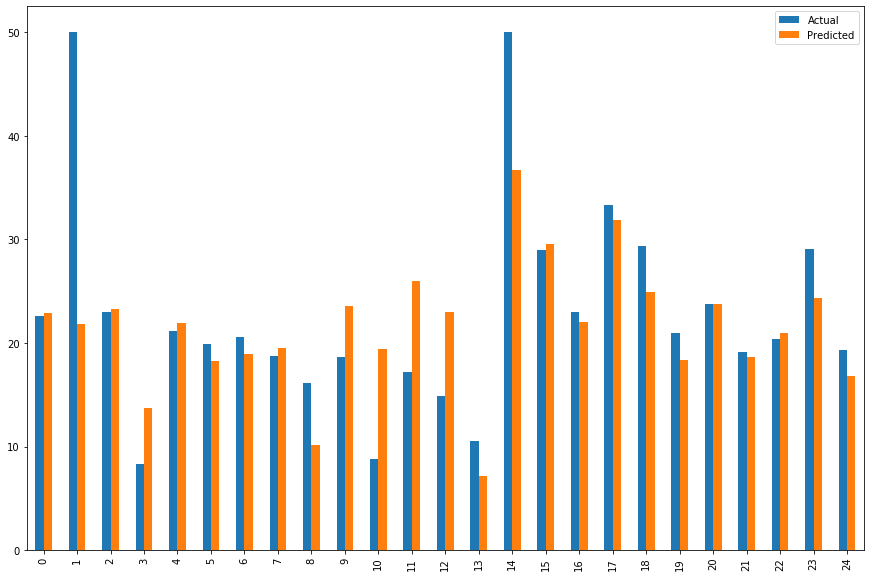

In [15]:
#Bar graph of predicted to actual on 25 results from the simple linear regression

df_lin_graph = df_lin_test.head(25)
df_lin_graph_out = df_lin_graph.plot(kind='bar',figsize=(15,10))
df_lin_graph_out

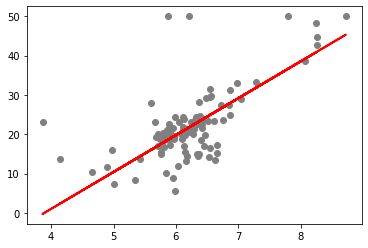

In [16]:
#Scatter plot with estimated straight line visual

plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

The linear regression model basically finds the best value for the intercept and slope, which results in a line that best fits the data. https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f

In [17]:
#For retrieving the slope:
print("The slope is: ",regressor.coef_)

The slope is:  [[9.37638431]]


What the above slope indicates is that for every room added there is approximately a ~$9376 increase in the housing price

In [18]:
#Mean square error as compared to mean of ~$22,500

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error: 6.848894190115314


You can see that the value of root mean squared error is 6.85, which is approximately 30% of the mean value of the housing prices of ~$22,533. This means that our algorithm was not very accurate but can still make moderate predictions.

**The theory is that tracts that border the Charles River (CHAS) will have higher median price (MEDV or target) 
than those that do not.**

Thus, the Null hypothesis for this situation is that the houses that are along the Charles river will be no different than
the houses that do not run along the Charles river in regards to median price

In [19]:
#Creating two Series to use to create two new dataframes based on the CHAS value
chas_0 = df['CHAS'] ==0
chas_1 = df['CHAS'] ==1

#Creating two new dataframes for homes along the river and ones that are not
df_chas_0 = df[chas_0]
df_chas_1 = df[chas_1]

#printing the count
print("Number of homes total in the sample are:          ",len(df))
print("Number of homes that are not along the river are: ",len(df_chas_0))
print("Number of homes that bound along the river are:   ",len(df_chas_1))
print("The mean housing price away from the Charles river: ",np.mean(df_chas_0['MEDV']))
print("The mean housing price close to the Charles river: ",np.mean(df_chas_1['MEDV']))

Number of homes total in the sample are:           506
Number of homes that are not along the river are:  471
Number of homes that bound along the river are:    35
The mean housing price away from the Charles river:  22.093842887473482
The mean housing price close to the Charles river:  28.44


Training the model of housing prices along the Charles River as per https://www.machinelearningplus.com/statistics/p-value/

OLS is for Ordinary Least Squares. 

Ordinary least squares (OLS) regression is a statistical method of analysis that estimates the relationship between one or more independent variables and a dependent variable; the method estimates the relationship by minimizing the sum of the squares in the difference between the observed and predicted values of the dependent variable configured as a straight line.

In [20]:
#Training the model of housing prices along the Charles River as per 
#https://www.machinelearningplus.com/statistics/p-value/
#OLS is for Ordinary Least Squares
model = smf.ols('MEDV ~ CHAS', data=df).fit()

#View the statistics after model training
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     15.97
Date:                Tue, 15 Sep 2020   Prob (F-statistic):           7.39e-05
Time:                        18:23:57   Log-Likelihood:                -1832.3
No. Observations:                 506   AIC:                             3669.
Df Residuals:                     504   BIC:                             3677.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     22.0938      0.418     52.902      0.0

In [21]:
#Call the p-value from the trained model
print(model.pvalues)

Intercept    7.002789e-208
CHAS          7.390623e-05
dtype: float64


With the p-value being significantly low for houses along the Charles River we can reject the Null hypothesis and conclude the housing along the Charles river will generally cost more than other houses. 

In [22]:
#Creating the Confidence Invertal for the prices along the Charles River based on t-score
data = df_chas_1['MEDV']

sc.t.interval(alpha=0.90, df=len(data)-1, loc=np.mean(data), scale=sc.sem(data)) 

(25.062586315862976, 31.817413667029342)

The above would indicate that we would have a 90% chance that houses along the Charles river would fall between ~$25000 and ~$31800

In [23]:
#Finding the group size needed with a power calculation

# parameters for the analysis 
effect_size = 0.6
alpha       = 0.10 # significance level set to match confidence level
power       = 0.8

power_analysis = TTestIndPower()
sample_size = power_analysis.solve_power(effect_size = effect_size, 
                                         power = power, 
                                         alpha = alpha)

print('Required sample size: {0:.2f}'.format(sample_size))

Required sample size: 35.04


**Imagine you are the city planner of Boston and can add various new features to each census tract, such as a park.**

Be creative with your new “features” – we use the term loosely. You can assume that none of the tracts contained your features previously. 

Design an experiment to explore the effects of these features on the media house price in census tracts. 
You should include an explanation of the experimental design as well as a plan of analysis, which should include a discussion of group size and power. 


**My Considerations would be as follows:**

The new features I would consider adding to my tracts are shopping (SHOP) and availability to public transit (PUB). I would then design a multiple linear regression against the MEDV to see how those elements impacted the median house price. I would also create a heat map to show the correlation on the new features to see how they correlate with the other factors in the tract.

It would important to have a group power of 80% as that is the standard cut off that would indicate that the there would be an 80% chance that the new features would end up with a p-value of 10% to indicate that they would either have an impact on the median housing price (below 10%) or that the null hypothesis of the new factors having no real impact on median housing price could not be discounted (above 10%).

I would estimate that we would see a similar sample size if we wished to keep withing the CHAS comparison and have a Cohen's d of 0.6, a significance of 10% and a power of 80%